# Modelling and Evaluation Notebook

## Objectives

Create a model to analyse OCT images to evaluate the condition of macula distingishing between 4 conditions: Normal, CNV, DNV, DRUSEN. This answers business requirement 2.

## Inputs

Data is divided in three folders: train, val, test with following paths:

1. inputs/OCTdata/train
2. inputs/OCTdata/val
3. inputs/OCTdata/test

Additionally, a pkl file with image shaping obtained in the image_visualisation notebook.

## Outputs

1. Images distribution plot in train, validation, and test set.
2. Image augmentation.
3. Class indices to change prediction inference in labels.
4. Machine learning model creation and training.
5. Save model.
6. Learning curve plot for model performance.
7. Model evaluation on pickle file.
8. Prediction on the random image file.




# Import packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

## Set Working Directory

Finding the curent working directory

In [2]:
working_dir = os.getcwd()
working_dir

'/workspace/OCTreader/jupiter_notebooks'

Moving it to the workspace directory

In [3]:
os.chdir('/workspace/OCTreader')
working_dir = os.getcwd()
working_dir

'/workspace/OCTreader'

Now we define paths for the train, val, test folders

In [4]:
split_dirs = os.listdir('inputs/OCTdata')
split_paths = {
    split_dirs[0]: 'inputs/OCTdata/' + split_dirs[0],
    split_dirs[1]: 'inputs/OCTdata/' + split_dirs[1],
    split_dirs[2]: 'inputs/OCTdata/' + split_dirs[2]
}
labels = os.listdir(split_paths[split_dirs[0]])

## Data availability

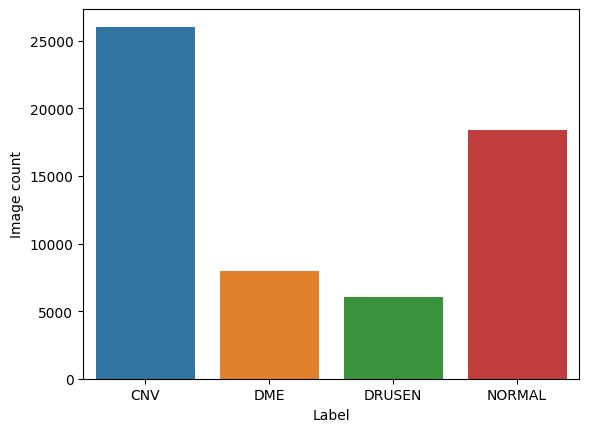

In [16]:
def data_availability_per_label(split_dir):
    '''
    Exploring the either train, val or test directoties
    counts the number of files per label

    '''
    df = pd.DataFrame(columns=['split_dir', 'label', 'count'])
    for label in labels:
        image_labels = os.listdir(split_paths[split_dir] + '/' + label)
        count = 0
        for image_name in image_labels:
            count += 1
        df = df.append({'label': label, 'count': count},
                       ignore_index=True)
    ax = sns.barplot(data=df, x='label', y='count')
    ax.set(xlabel='Label', ylabel='Image count')
    plt.show()


data_availability_per_label('train')